In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  glob
import seaborn as sns
import re
from io import StringIO

tocategory = lambda col: pd.Categorical(col)
underscoretospace = lambda x: x.replace("_", " ") if type(x) is str else x
def q5(x): return x.quantile(.05)
def q95(x): return x.quantile(.95)

In [13]:
filenames = glob.glob("data/lsb.*.r*") + glob.glob("data/*/lsb.*.r*")
params = ["Algorithm", "Max threads", "Graph nodes"];

def remove_space(filename):
    with open(filename) as f:
        return re.sub(" +", ' ', f.read())

files = [StringIO(remove_space(filename)) for filename in filenames]

In [14]:
def get_df(file):
    return (pd
      .read_csv(file, sep=" ", comment="#", skipinitialspace=True, index_col="id")
      .applymap(underscoretospace)
      .dropna("columns", "all")
    )
df = pd.concat(get_df(file) for file in files)
df[["Algorithm", "Graph_name"]] = df[["Algorithm", "Graph_name"]].apply(tocategory)
df.columns = df.columns.map(underscoretospace)
df['Graph'] = df.apply(lambda x: (x['Graph name'], x['Graph nodes']), 1)

In [15]:
df.head(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead,Graph
id,,,,,,,,
0,parallel sollin EL,10000,Erdos-Renyi random,1,0,939626.318359,1,"(Erdos-Renyi random, 10000)"
0,parallel sollin EL,10000,Erdos-Renyi random,1,1,918234.640137,2,"(Erdos-Renyi random, 10000)"
0,parallel sollin EL,10000,Erdos-Renyi random,1,2,899298.442383,1,"(Erdos-Renyi random, 10000)"
0,parallel sollin EL,10000,Erdos-Renyi random,2,0,730224.237793,0,"(Erdos-Renyi random, 10000)"
0,parallel sollin EL,10000,Erdos-Renyi random,2,1,722391.649902,0,"(Erdos-Renyi random, 10000)"


In [16]:
df.tail(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead,Graph
id,,,,,,,,
0,Filter Sollin,100000,Preferential attachment 50 edges per vertice,32,0,4.432687e+06,0,"(Preferential attachment 50 edges per vertice,..."
0,Filter Sollin,100000,Preferential attachment 50 edges per vertice,32,1,4.238933e+06,0,"(Preferential attachment 50 edges per vertice,..."
0,Filter Sollin,100000,Preferential attachment 50 edges per vertice,32,2,3.357033e+06,0,"(Preferential attachment 50 edges per vertice,..."
0,Filter Sollin,100000,Preferential attachment 50 edges per vertice,32,3,4.079936e+06,0,"(Preferential attachment 50 edges per vertice,..."
0,Filter Sollin,100000,Preferential attachment 50 edges per vertice,32,4,5.333197e+06,0,"(Preferential attachment 50 edges per vertice,..."


In [17]:
timequantiles = df.groupby(params).agg([q5, q95])["time"]
df_timequantiles =  timequantiles.loc[map(tuple, df[params].values)]

In [18]:
summary = (df[params + ["time"]]
    [(df.time >= df_timequantiles["q5"].values) & (df.time <= df_timequantiles["q95"].values)]
    .groupby(params).agg(["median", "mean", "min", "max", "std"])
)

In [19]:
summary

time                \
                                                  median          mean   
Algorithm          Max threads Graph nodes                               
Boost Kruskal      1           1000         5.695723e+03  5.942840e+03   
                               10000        3.097689e+05  2.659023e+05   
                               100000       5.928134e+06  5.234927e+06   
                               1524453      7.810995e+06  7.805934e+06   
                   2           1000         5.226334e+03  5.223707e+03   
                               10000        3.049774e+05  2.534147e+05   
                               100000       5.977962e+06  5.127063e+06   
                               1524453      8.169554e+06  8.143045e+06   
                   4           1000         5.135697e+03  5.145610e+03   
                               10000        3.087924e+05  2.679368e+05   
                               100000       5.940230e+06  5.059106e+06   
                               1524453      8.231641e+06  8.244669e+06   
                   8           1000         5.159247e+03  5.153803e+03   
                               10000        3.096082e+05  2.577646e+05   
                               100000       5.936718e+06  5.045088e+06   
                               1524453      8.083295e+06  8.128877e+06   
                   16          1000         5.174139e+03  5.175370e+03   
                               10000        3.073588e+05  2.558892e+05   
                               100000       5.984685e+06  5.057406e+06   
                               1524453      8.759788e+06  8.689718e+06   
                   32          1000         5.221990e+03  5.225979e+03   
                               10000        3.070671e+05  2.560195e+05   
                               100000       5.968762e+06  5.053160e+06   
                               1524453      8.995894e+06  8.807345e+06   
Filter Kruskal     1           1000         1.397589e+03  1.350281e+03   
                               10000        3.130652e+04  2.827921e+04   
                               100000       3.580094e+05  3.710573e+05   
                               1524453      2.236985e+06  2.034741e+06   
                   2           1000         1.498307e+03  1.521762e+03   
                               10000        2.483896e+04  2.367168e+04   
...                                                  ...           ...   
parallel sollin EL 2           1000         4.367220e+04  4.359936e+04   
                               10000        7.267910e+05  9.009371e+05   
                               100000       2.152427e+07  3.659437e+07   
                               264346       1.490276e+06  4.613591e+06   
                               321270       1.661834e+06  1.661834e+06   
                               435666       2.531510e+06  6.777728e+06   
                   4           1000         5.401234e+04  5.837955e+04   
                               10000        1.389058e+06  1.402718e+06   
                               100000       3.132393e+07  2.865478e+07   
                               264346       2.069616e+06  2.046551e+06   
                               321270       2.370536e+06  2.370536e+06   
                               435666       3.085977e+06  3.078578e+06   
                   8           1000         8.702928e+04  8.745020e+04   
                               10000        1.705104e+06  2.042298e+06   
                               100000       3.261462e+07  3.106515e+07   
                               264346       2.652240e+06  2.903968e+06   
                               321270       2.892868e+06  2.892868e+06   
                               435666       3.688543e+06  4.388256e+06   
                   16          1000         1.156561e+05  1.157243e+05   
                               10000        2.323133e+06  2.315297e+06   
                               100000       3.426564e+07

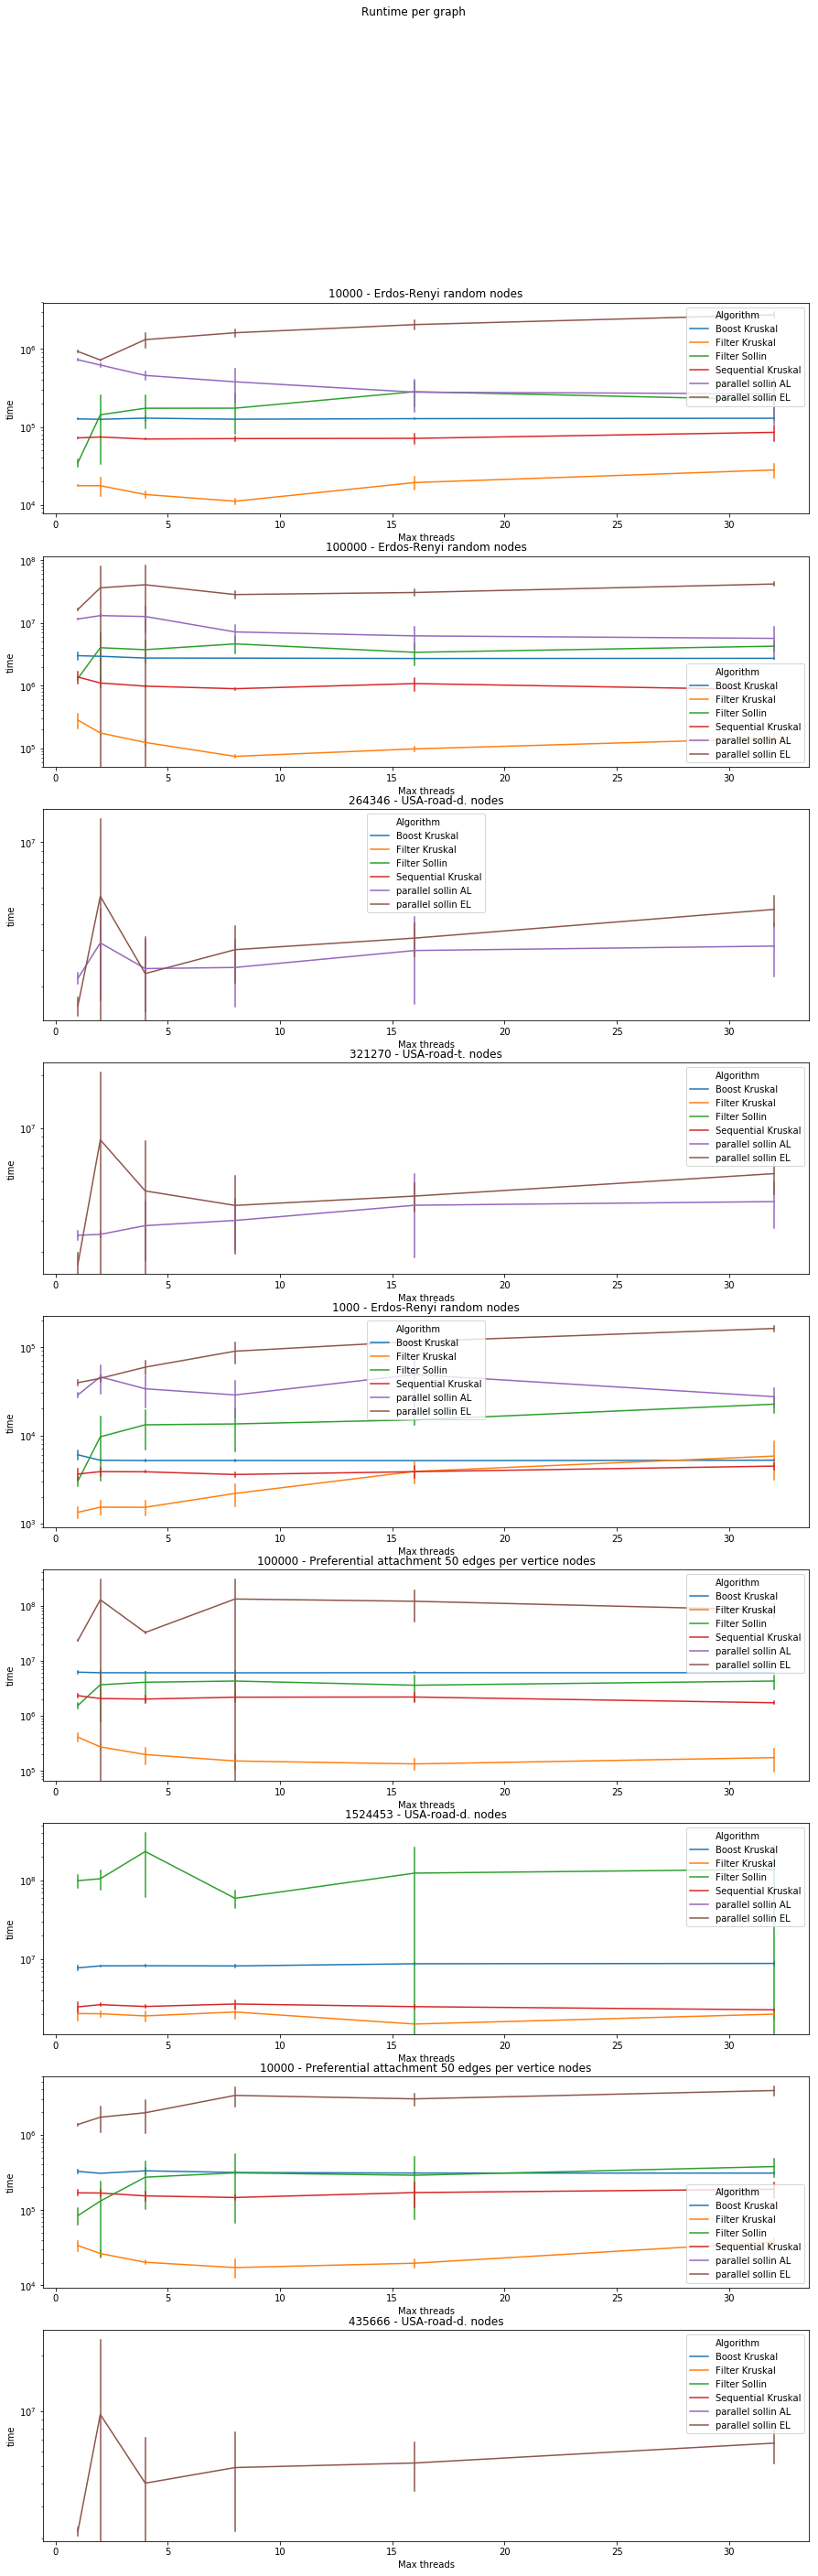

In [20]:
fig, ax = plt.subplots(nrows=len(df.Graph.unique()),figsize=(15,5*len(df.Graph.unique())))
for i, e in enumerate(df.Graph.unique()):
    sns.lineplot(
        ax=ax[i], 
        data=df[df.Graph == e], 
        x="Max threads", 
        y="time", 
        hue="Algorithm",
        markers=True,
        ci="sd",
        err_style="bars",
    ).set(yscale="log")
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")
    #ax[i].set_ylim(1,)
plt.suptitle("Runtime per graph")
plt.show()

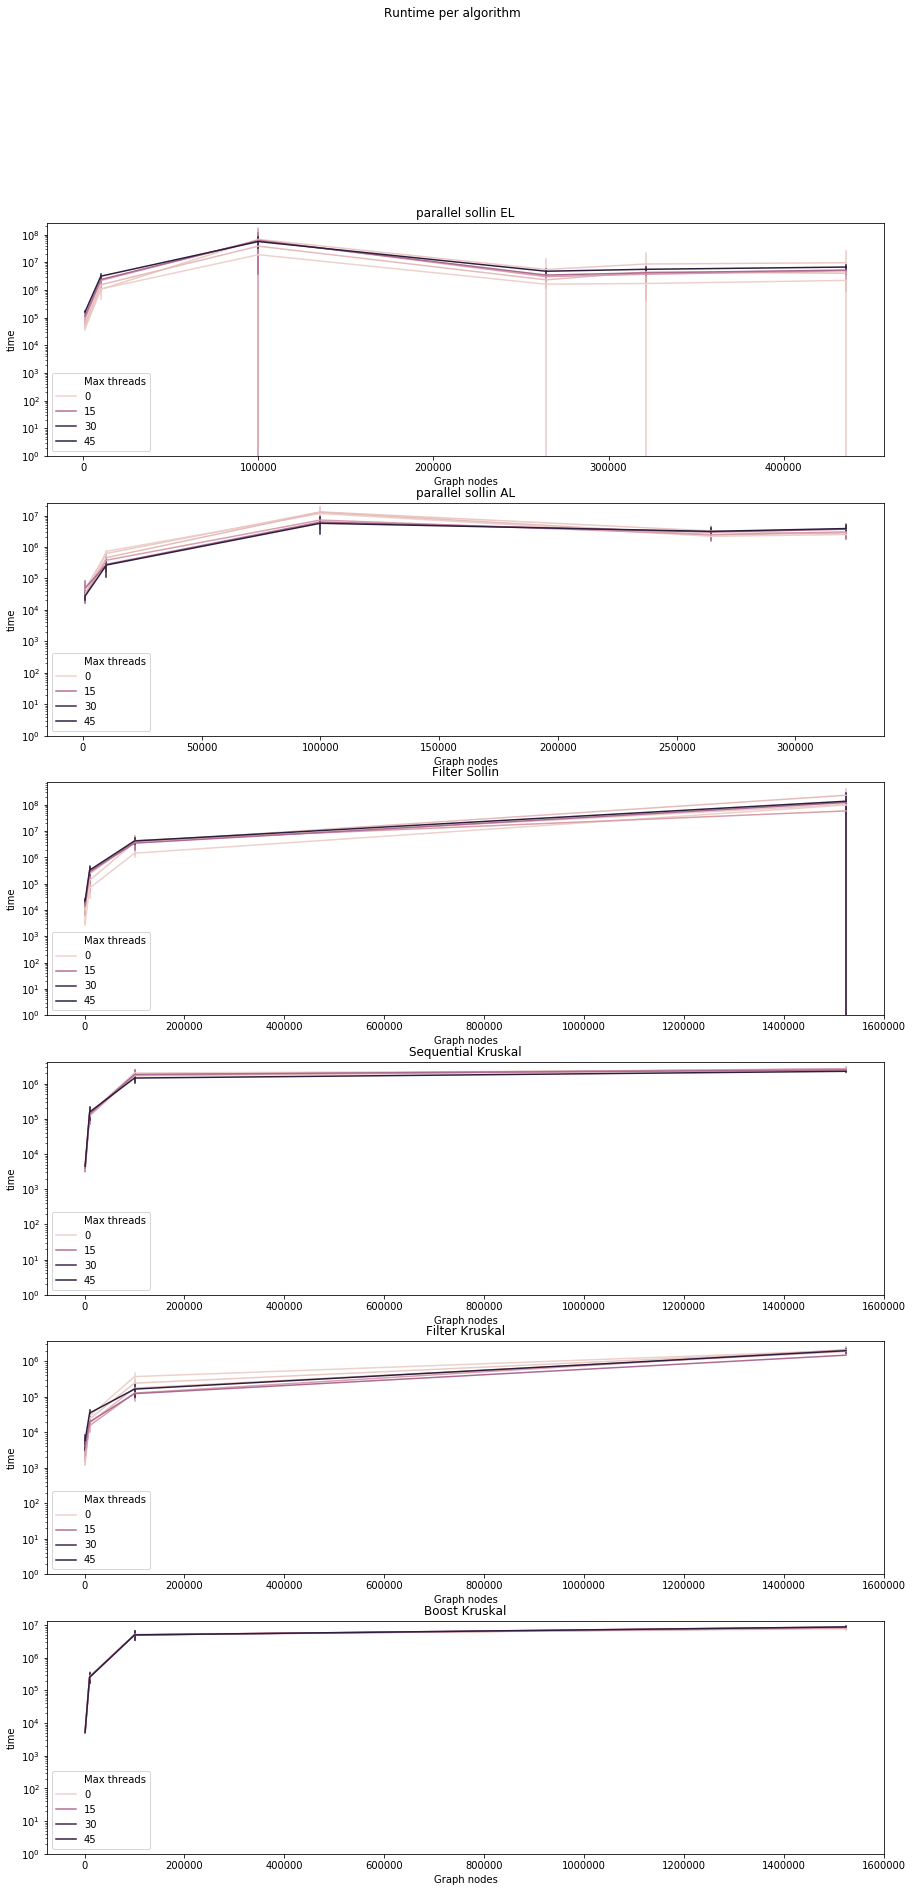

In [21]:
fig, ax = plt.subplots(nrows=len(df["Algorithm"].unique()),figsize=(15,5*len(df["Algorithm"].unique())))
for i, e in enumerate(df["Algorithm"].unique()):
    sns.lineplot(
        ax=ax[i], 
        data=df[df["Algorithm"].values == e], 
        x="Graph nodes", 
        y="time", 
        hue="Max threads",
        markers=True,
        ci="sd",
        err_style="bars",
    ).set(yscale="log")
    ax[i].set_title(f"{e}")
    ax[i].set_ylim(1,)
plt.suptitle("Runtime per algorithm")
plt.show()

In [22]:
g_idx = ["Graph nodes", "Graph name"]
graphs = df[g_idx].drop_duplicates().values

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


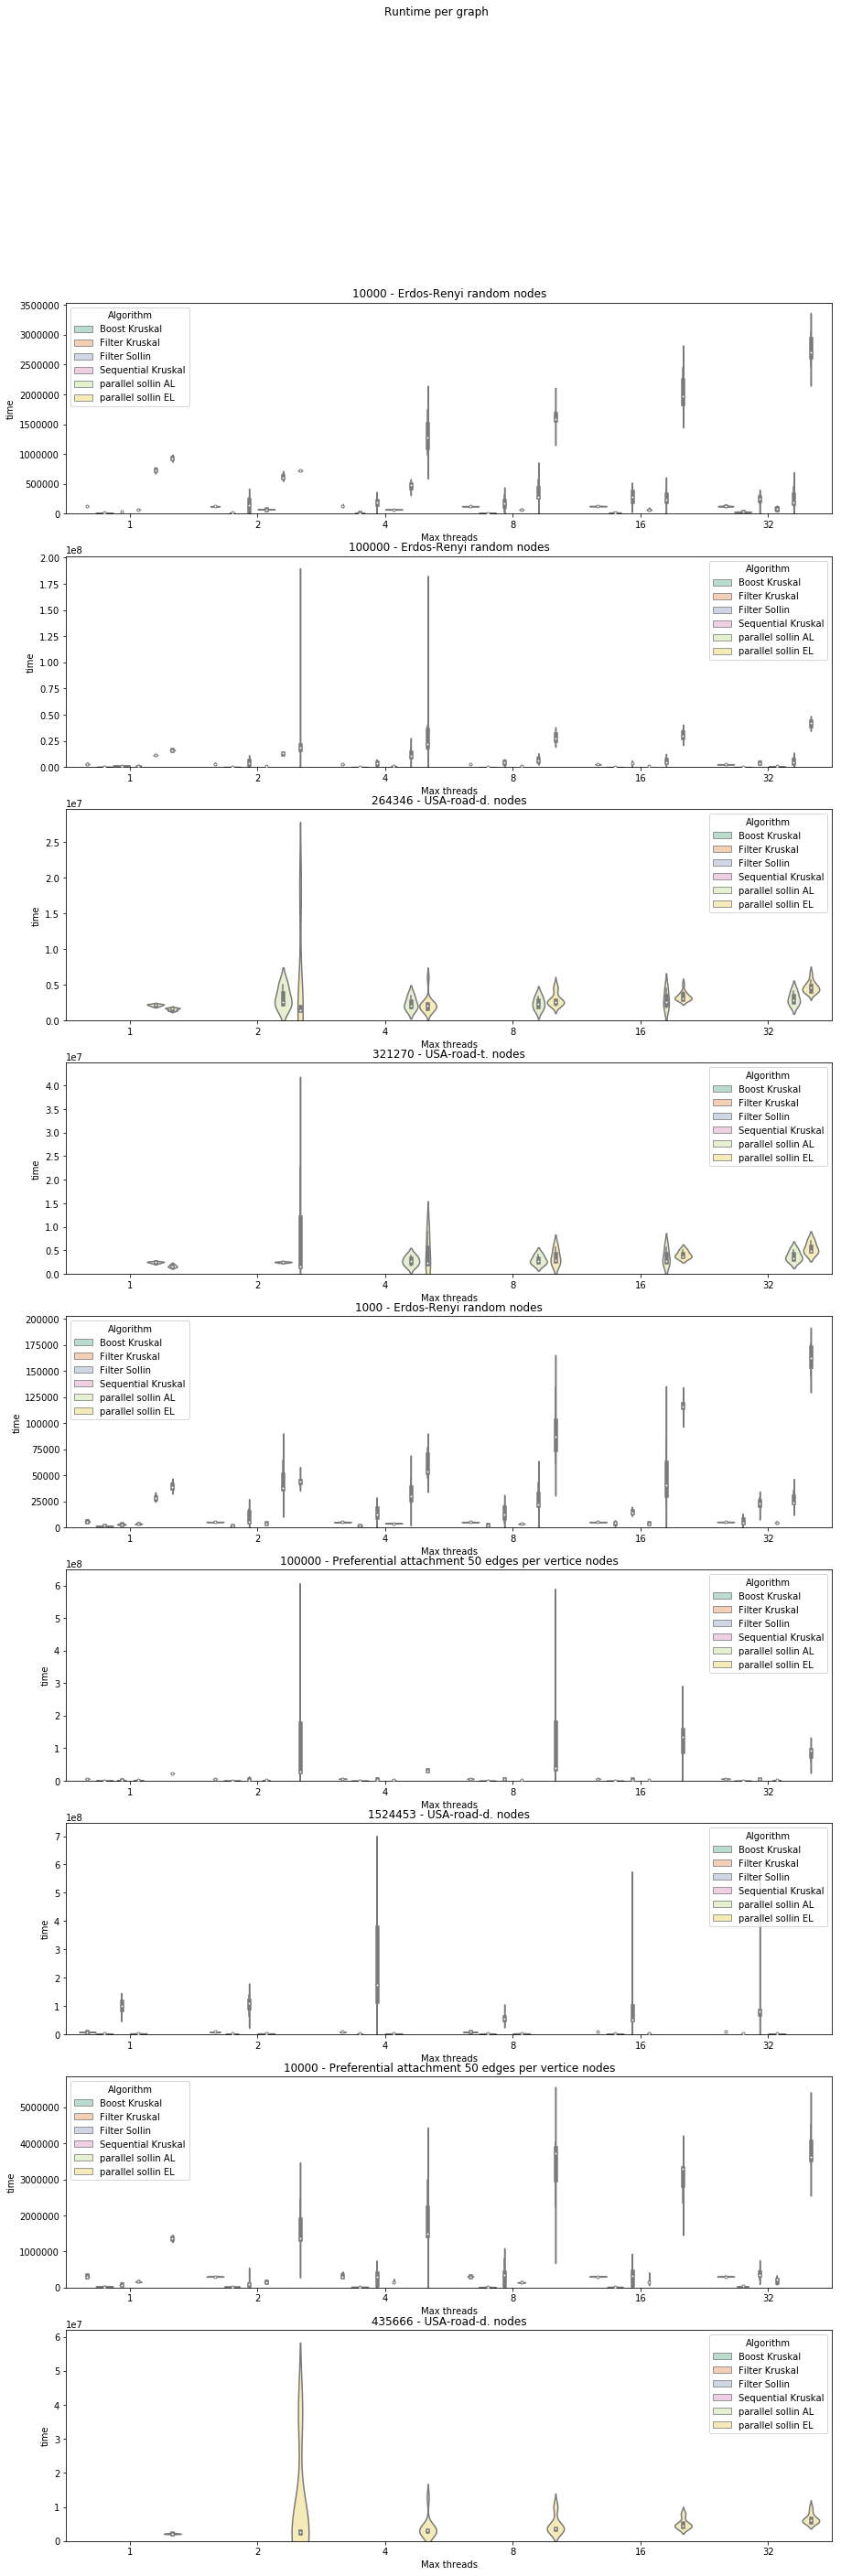

In [23]:
fig, ax = plt.subplots(nrows=len(df.Graph.unique()),figsize=(15,5*len(df.Graph.unique())))
for i, e in enumerate(df.Graph.unique()):
    sns.violinplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df.Graph == e], 
        palette="Pastel2", ax=ax[i]
    )
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")
    ax[i].set_ylim(0,)
plt.suptitle("Runtime per graph")
plt.show()

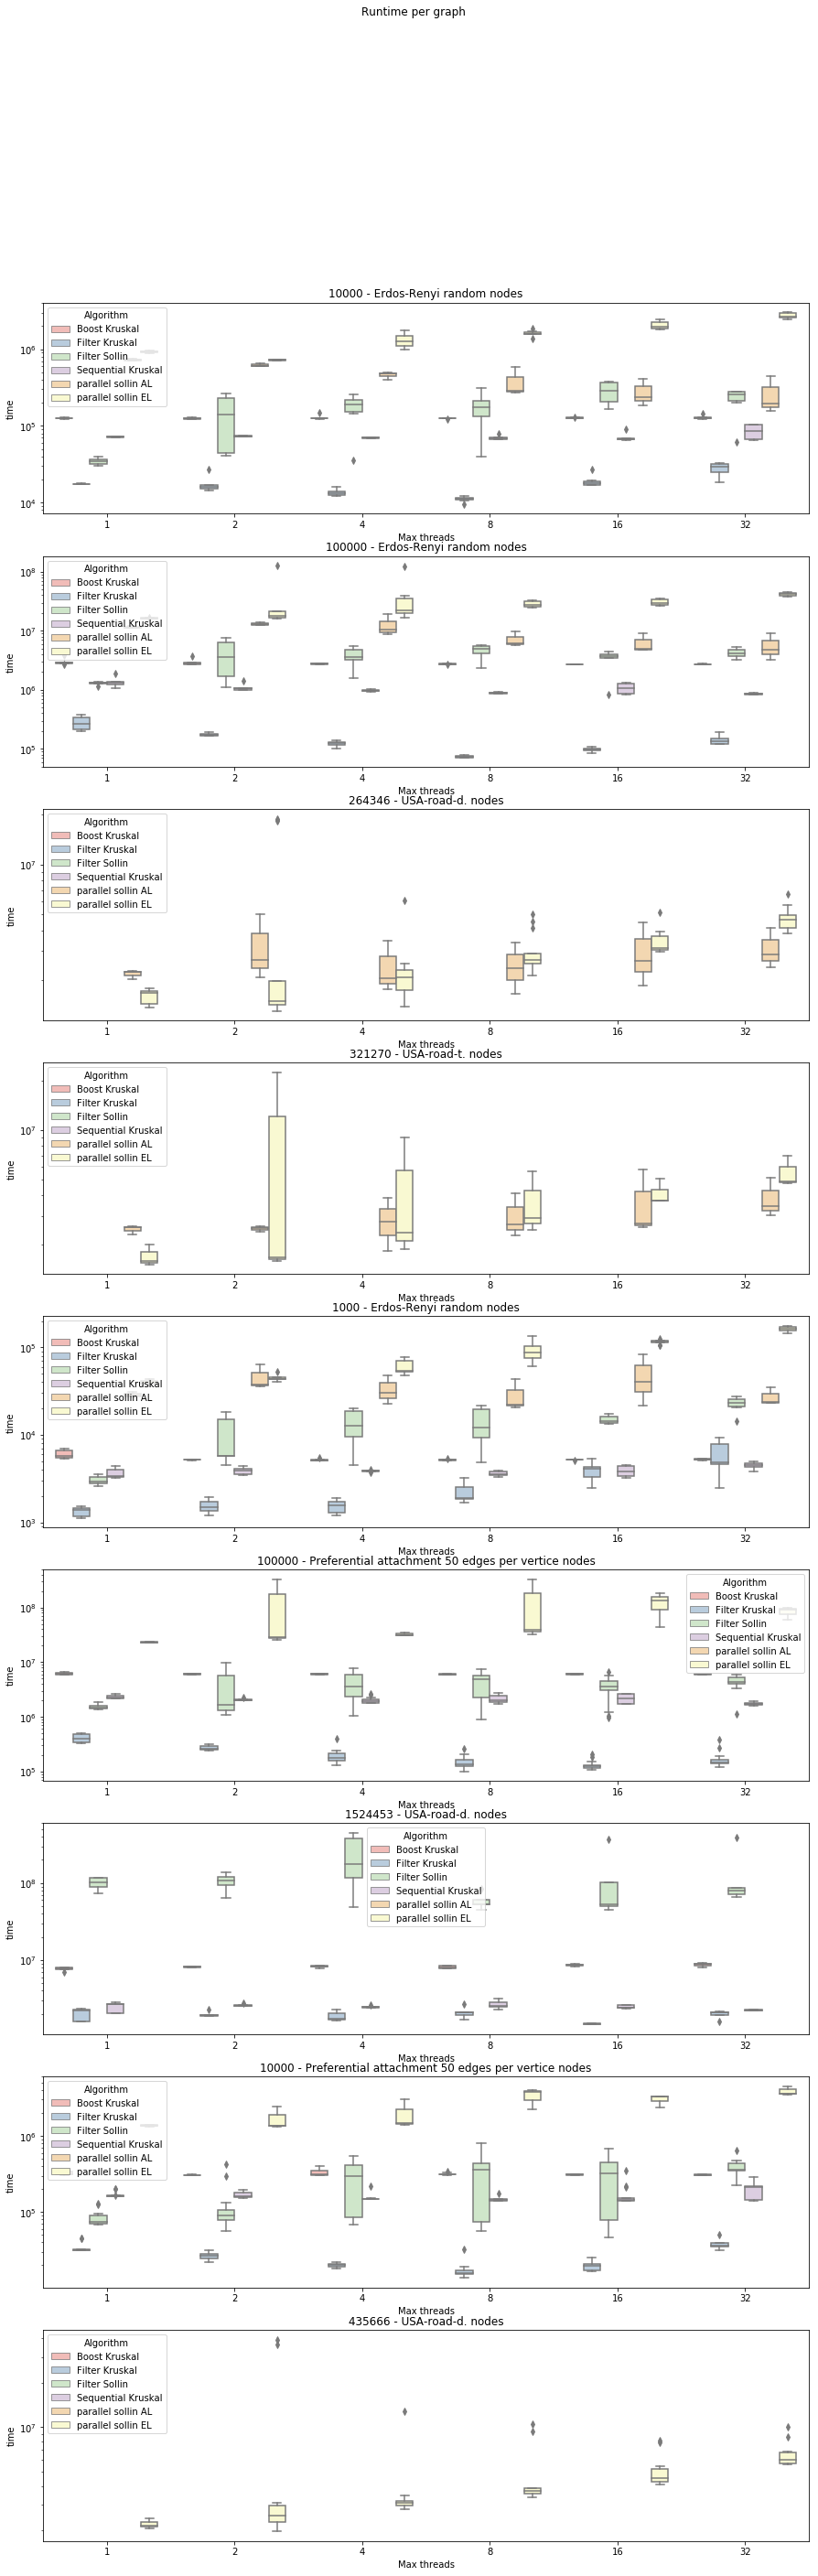

In [24]:
fig, ax = plt.subplots(nrows=len(df.Graph.unique()),figsize=(15,5*len(df.Graph.unique())))
for i, e in enumerate(df.Graph.unique()):
    sns.boxplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df.Graph == e], 
        palette="Pastel1", ax=ax[i]
    ).set(yscale="log")
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")
plt.suptitle("Runtime per graph")
plt.show()

In [ ]:
reference_algorithm = "ParallelSollinAL"
reference_times = df[(df.Algorithm == reference_algorithm) & (df['Max threads'] == 1)][["Graph", "time"]].groupby('Graph').median()['time']

df['speedup'] = df.apply(lambda x: x.time / reference_times[x.Graph], 1)

fig, ax = plt.subplots(nrows=len(df.Graph.unique()),figsize=(15,5*len(df.Graph.unique())))
for i, e in enumerate(df.Graph.unique()):
    sns.lineplot(
        ax=ax[i], 
        data=df[df.Graph == e], 
        x="Graph nodes", 
        y="speedup", 
        hue="Max threads",
        markers=True,
        ci="sd",
        err_style="bars",
    )#.set(yscale="log")
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")
    ax[i].set_ylim(1,)
plt.title("Speedup per graph")
plt.show()